In [1]:
# 응용 - 유방암 데이터 진단 
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# 데이터 불러오기
data = load_breast_cancer(as_frame = True)
print(data)

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave po

In [4]:
print(data.frame)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [6]:
print('data의 입력부분')
print(data.data)
print('data의 목표 값')
print(data.target)

data의 입력부분
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave 

In [7]:
# 탐색적 데이터 분석 
print(data.DESCR)
#  DESCR -> 데이터셋에 대한 텍스트 형식의 설명서

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


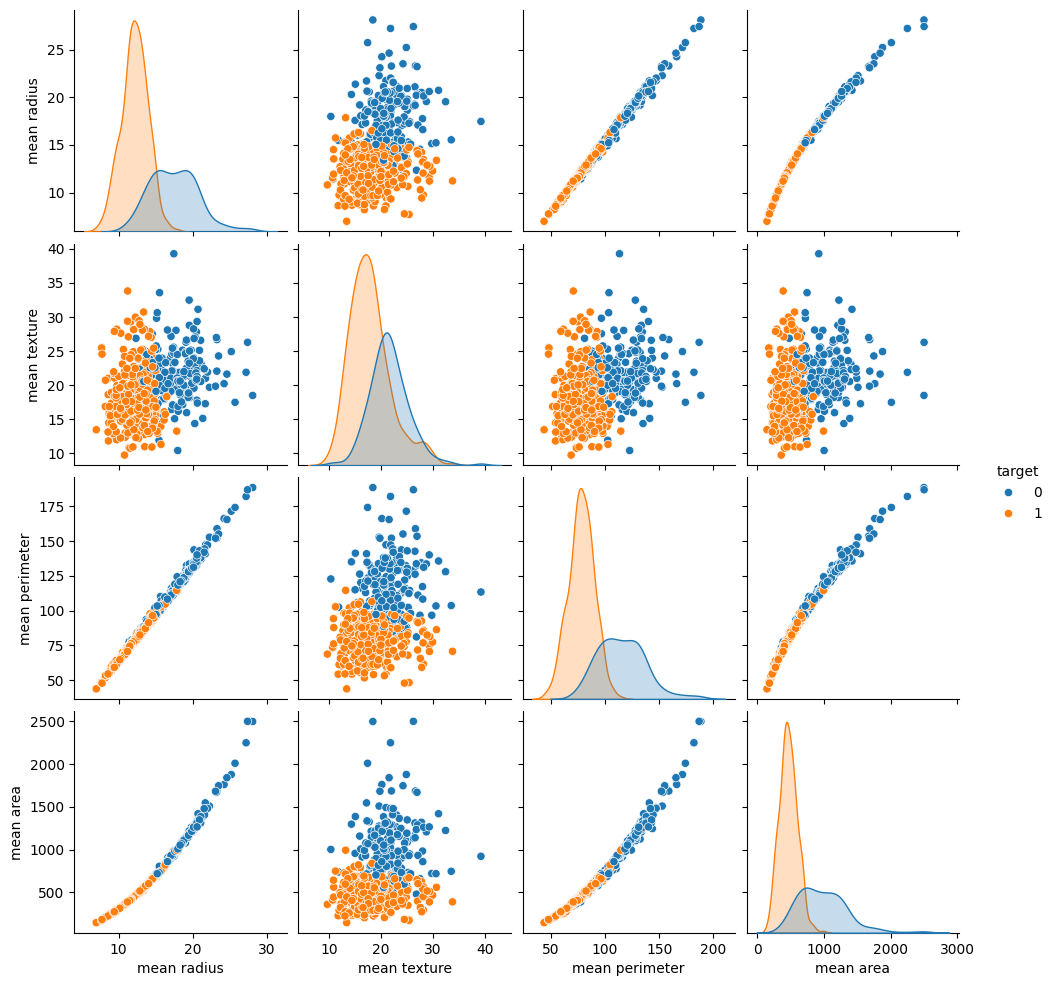

In [10]:
# 변수 간 산포도
import seaborn as sns
data_mean = data.frame[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']]
sns.pairplot(data_mean, hue='target')

In [11]:
# 데이터 분리 
### 학습 데이터와 테스트 데이터를 7 : 3으로 분리한다
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.3, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [12]:
# feature scalaer 
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

[[-1.53753797 -0.55554819 -1.51985982 ... -1.73344373 -0.77142494
   0.22129607]
 [-0.79609663 -0.38603656 -0.81356785 ... -0.43011095  0.08970515
  -0.36303452]
 [ 0.21752653 -0.38603656  0.18557689 ...  0.76443594  0.80894448
  -0.67502531]
 ...
 [-0.48269225 -0.14686262 -0.46083202 ... -0.21253919  0.1565732
   0.16129784]
 [ 1.14079887 -0.12364185  1.14739725 ...  0.25197353  0.1679897
  -0.23677737]
 [-0.41210568 -1.26610378 -0.43253113 ... -0.78299078 -0.89537548
  -0.79241315]]


In [13]:
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[-0.70856928  0.18287232 -0.70200489 ... -0.5167201   0.46971142
   0.26564259]
 [-0.95421055 -2.21118915 -0.9661466  ... -1.04371727 -1.35040445
  -0.38703381]
 [-0.48833918 -0.6553975  -0.38864423 ...  0.27744681  0.51048462
   0.99083859]
 ...
 [-0.45163416 -0.19330417 -0.51251192 ... -1.60200162 -0.67356925
  -1.04857951]
 [-0.45728109 -0.037725   -0.42678891 ... -0.34515008 -1.29984567
  -0.65363464]
 [ 0.58740016  0.61477866  0.62239509 ... -0.16458949 -0.29682483
  -0.25451598]]


In [14]:
# 모형화 및 학습
clf = svm.SVC(kernel = 'linear')

In [16]:
clf.fit(X_train_std, y_train) # LA

SVC(kernel='linear')

In [17]:
y_pred = clf.predict(X_test_std)
print(y_pred)

[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0]


In [18]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[ 58   8]
 [  1 104]]


In [19]:
clf.score(X_test_std, y_test)

0.9473684210526315